In [1]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wavelength_nm = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5



print(dipoles.initial_field(wavelength_nm, angle, 1, eps_Au, point, phase, a))


p, m =  dipoles.calc_dipoles_v2(wavelength_nm, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
print(np.round(p,39))

print(np.round(m,34))

# p2,m2 = dipoles.calc_dipoles(wavelength_nm, eps_Au, 40, R, eps_Si, point, angle, amplitude=1, phase=phase, a=a)

# print(np.round(p2,39))

# print(np.round(m2,34))


wl = np.linspace(600, 1200, 60)

Px=[]
Py=[]
Pz=[]
Mx=[]
My=[]
Mz=[]

# res = np.empty((3,len(wl)))
for i in tqdm(range(len(wl))):

    p,m =  dipoles.calc_dipoles_v2(wl[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    Px.append(p[0])
    Py.append(p[1])
    Pz.append(p[2])
    Mx.append(m[0])
    My.append(m[1])
    Mz.append(m[2])

  

(array([[0.27747304-1.22425j   ],
       [0.25039754-1.35334001j],
       [0.0973912 +0.01790005j]]), array([[ 0.00068853+0.00010798j],
       [-0.0006117 -0.00011243j],
       [ 0.0002809 -0.00151818j]]))
[[ 1.41479539e-31+2.05676844e-31j]
 [ 1.64312551e-31+2.19043750e-31j]
 [-9.49038800e-33+1.82580310e-32j]]
[[ 4.41970509e-24+1.57708522e-23j]
 [-3.66961395e-24-1.46333469e-23j]
 [ 8.90527125e-25+2.01629808e-23j]]


  5%|▌         | 3/60 [00:01<00:34,  1.67it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 48%|████▊     | 29/60 [00:19<00:21,  1.42it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:41<00:00,  1.43it/s]


In [ ]:
dipoles = np.loadtxt('comsol/dipoles 146 sub p.txt', skiprows=8, delimiter=',')

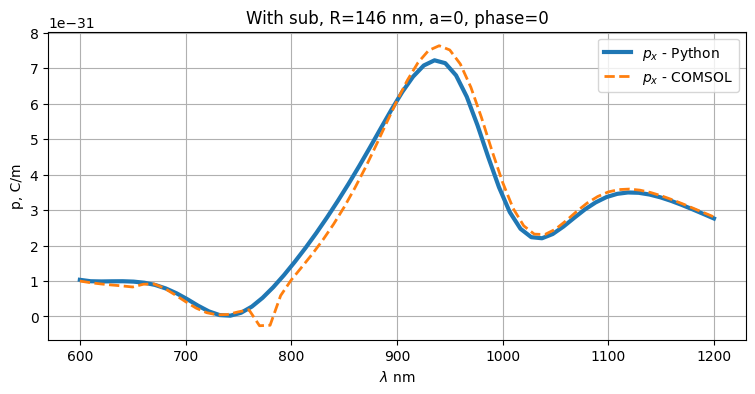

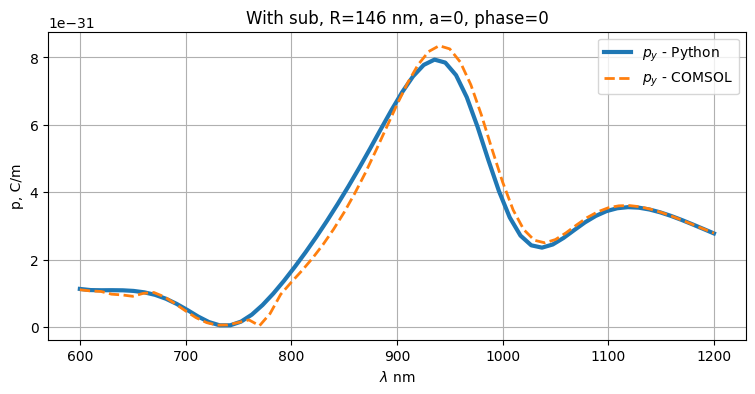

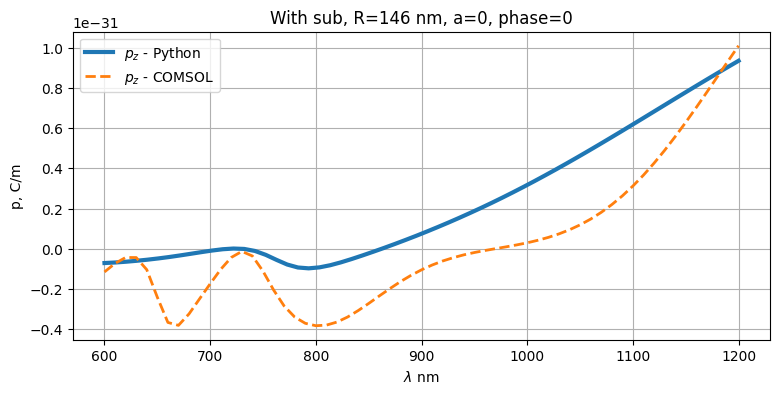

In [19]:
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Px), label='$p_x$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,1], label='$p_x$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
#plt.xlim(700,840)
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Py), label='$p_y$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,2], label='$p_y$ - COMSOL', linestyle='dashed', lw=2)
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Pz), label ='$p_z$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,3], label='$p_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

In [3]:
mdipoles = np.loadtxt('comsol/dipoles 146 sub m.txt', skiprows=8, delimiter=',')

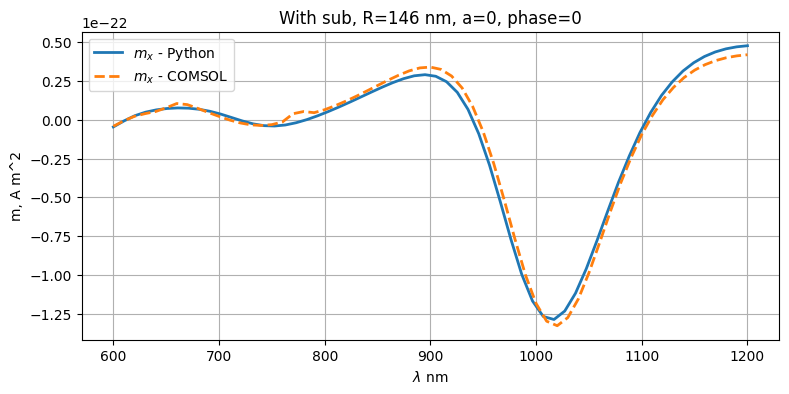

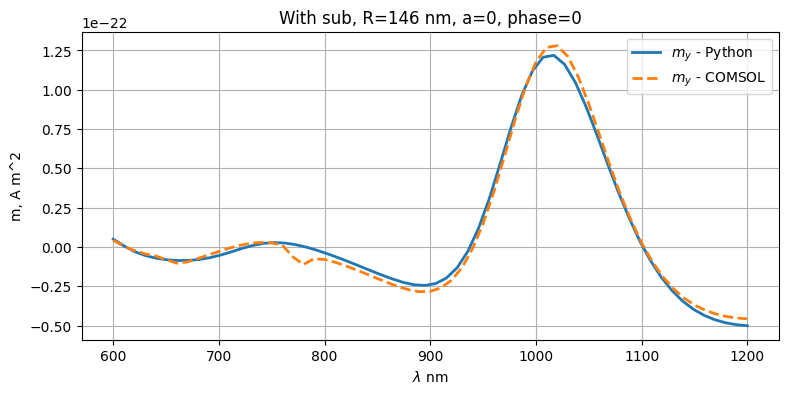

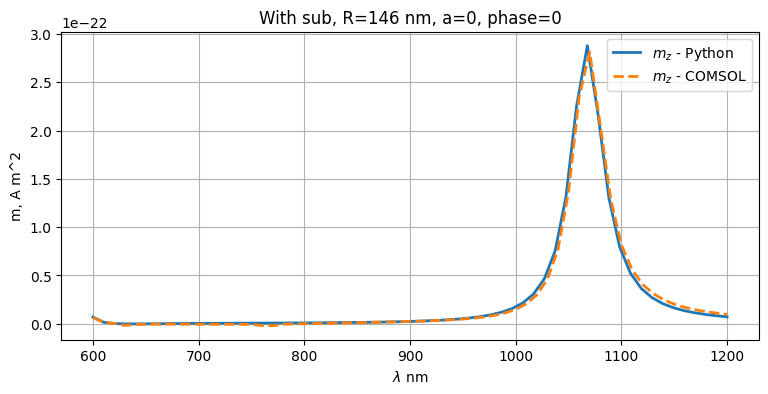

In [4]:
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Mx), label='$m_x$ - Python', lw=2) 
plt.plot(mdipoles[:,0], mdipoles[:,1], label='$m_x$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()
 
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(My), label='$m_y$ - Python', lw=2)
plt.plot(mdipoles[:,0], mdipoles[:,2], label='$m_y$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()
  
plt.figure(figsize=(9,4))
plt.plot(wl, np.real(Mz), label='$m_z$ - Python', lw=2)   
plt.plot(mdipoles[:,0], mdipoles[:,3], label='$m_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('With sub, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()

In [1]:
import numpy as np
import force
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import dipoles

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5



# print(dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP ))

# print(force.F(wl, eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP))



wls = np.linspace(600,1200, 50)
F_x = np.empty_like(wls)
F_y = np.empty_like(wls)
F_z = np.empty_like(wls)
for i in tqdm(range(len(wls))):
    F_x[i], F_y[i], F_z[i] = force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP)

 48%|████▊     | 24/50 [00:54<01:00,  2.31s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [01:55<00:00,  2.30s/it]


In [ ]:
p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
p = p[:,0]
E0, H0 = dipoles.initial_field(wl, angle, 1, eps_Au, point, phase, a)
E0=E0[:,0]
k= 2*np.pi/wl/1e-9
kx = k*np.sin(angle)

print(np.conj(p)*E0*kx*1j)

Fx_e0 = 0.5*np.real(np.sum(np.conj(p)*E0*kx*1j))
print(Fx_e0)

Fx_e0 = 0.5*np.imag((np.conj(p)@E0*kx))
print(Fx_e0)

[7.64340753e-25-7.05480785e-25j 9.20154528e-25-8.47391710e-25j
 6.46603769e-27-1.98311287e-27j]
8.454806592668274e-25
-8.454806592668274e-25


In [7]:
print(dipoles.initial_field(wl, angle, 1, eps_Au, point, phase, a))

(array([[0.27747304-1.22425j   ],
       [0.25039754-1.35334001j],
       [0.0973912 +0.01790005j]]), array([[ 0.00068853+0.00010798j],
       [-0.0006117 -0.00011243j],
       [ 0.0002809 -0.00151818j]]))


In [3]:
force_comsol = np.loadtxt('comsol/force_sub_146_a_05.txt', skiprows=8, delimiter=',')

force_comsol_2d = np.loadtxt('comsol/force_2d_sub.txt', skiprows=8, delimiter=',')

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\636015073.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


Text(0.5, 0, '$\\lambda$')

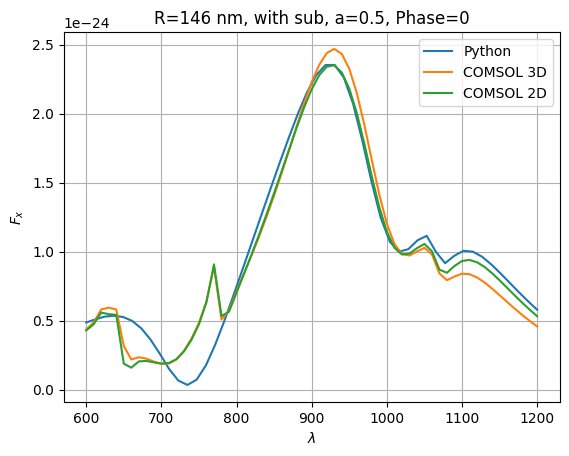

In [4]:
import matplotlib.pyplot as plt
plt.plot(wls, F_x, label='Python')
plt.ylabel('$F_x$')
plt.plot(force_comsol[:,0],force_comsol[:,1], label='COMSOL 3D' )
plt.plot(force_comsol_2d[:,0],force_comsol_2d[:,1], label='COMSOL 2D' )
plt.legend()
plt.grid()
plt.title('R=146 nm, with sub, a=0.5, Phase=0')
plt.xlabel('$\lambda$')

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\3700772079.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


Text(0.5, 0, '$\\lambda$')

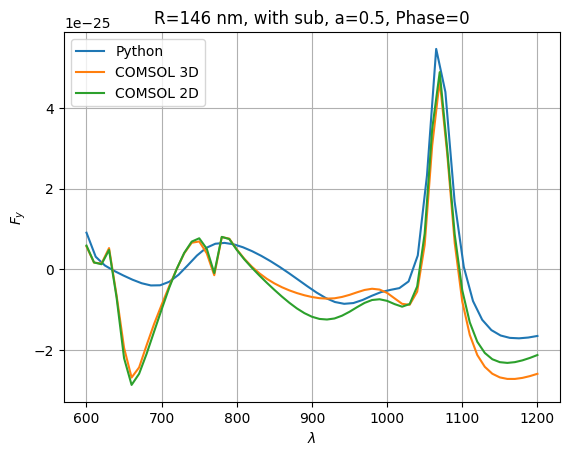

In [5]:
plt.plot(wls, F_y, label='Python')
plt.ylabel('$F_y$')
plt.plot(force_comsol[:,0],force_comsol[:,2], label='COMSOL 3D' )
plt.plot(force_comsol_2d[:,0],force_comsol_2d[:,2], label='COMSOL 2D' )
plt.legend()
plt.grid()
plt.title('R=146 nm, with sub, a=0.5, Phase=0')
plt.xlabel('$\lambda$')

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\952969983.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$')


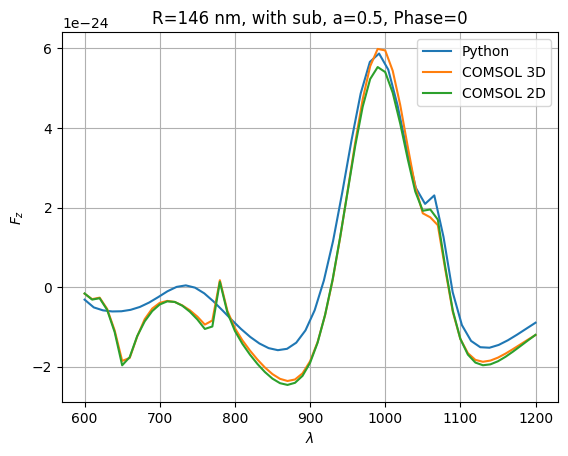

In [6]:
plt.plot(wls, F_z, label='Python')
plt.plot(force_comsol[:,0],force_comsol[:,3], label='COMSOL 3D' )
plt.plot(force_comsol_2d[:,0],force_comsol_2d[:,3], label='COMSOL 2D' )
plt.legend()
plt.ylabel('$F_z$')
plt.title('R=146 nm, with sub, a=0.5, Phase=0')
plt.xlabel('$\lambda$')
plt.grid()

In [4]:
import green_func
import frenel
import numpy as np
import matplotlib.pyplot as plt

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0


dy_Green_E_yz = []

# wls = np.linspace(600,1200,30)
# for wl in wls:
#     dy_Green_E_yz.append(green_func.dy_green_E_H_yz())

print(green_func.dz_green_E_H(wl, point[2], eps_Au, np.inf))

(array([[-1.13792717e+12+1.10183557e+12j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j, -1.13792717e+12+1.10183557e+12j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -1.55132578e+12-1.72269781e+12j]]), array([[7.98068602e+11-1.48331780e+12j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 7.98068602e+11-1.48331780e+12j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        8.71608647e+11+9.59733359e+11j]]))


# Сравнение сил в свободном пространстве:

Параметры

| $\lambda$, nm | a | $\varphi$, deg | $\theta$, rad | R, nm | Dist, nm |
|---|---|---|---|---|---|
| 600-1200 | 0.5 | 0 | 25 | 146 | 20 |

In [10]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Si = frenel.get_interpolate('Si')


STOP = 45
R = 146
dist = 110
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5

wls = np.linspace(600, 1200, 60)

P, M = np.empty(shape=(len(wls), 3)), np.empty(shape=(len(wls), 3))

for i in tqdm(range(len(wls))):
    p,m =  dipoles.calc_dipoles_v2(wls[i], 1, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    P[i,:] = p[:,0]
    M[i,:] = m[:,0]


  

  0%|          | 0/60 [00:00<?, ?it/s]C:\Users\borod\AppData\Local\Temp\ipykernel_15088\2779829851.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  P[i,:] = p[:,0]
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\2779829851.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i,:] = m[:,0]
100%|██████████| 60/60 [00:00<00:00, 63.76it/s]


In [14]:
P_c = np.loadtxt('comsol//p free space 146.txt', skiprows=8, delimiter=',')

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\604490622.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\604490622.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$C \cdot m$')


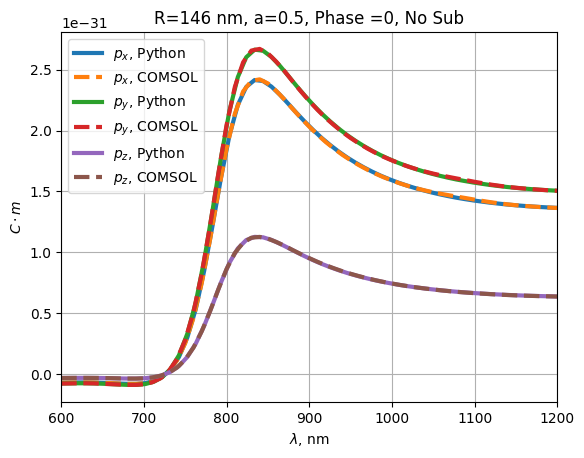

In [21]:
plt.plot(wls, P[:,0], label='$p_x$, Python', lw=3)
plt.plot(P_c[:,0], P_c[:,1], label='$p_x$, COMSOL', linestyle='--', lw=3)

plt.plot(wls, P[:,1], label='$p_y$, Python', lw=3)
plt.plot(P_c[:,0], P_c[:,2], label='$p_y$, COMSOL', lw=3, linestyle='--')

plt.plot(wls, P[:,2], label='$p_z$, Python', lw=3)
plt.plot(P_c[:,0], P_c[:,3], label='$p_z$, COMSOL', lw=3, linestyle='--')

plt.grid()
plt.xlim(wls[0], wls[-1])
plt.legend()
plt.title('R=146 nm, a=0.5, Phase =0, No Sub')
plt.xlabel('$\lambda$, nm')
plt.ylabel('$C \cdot m$')
plt.show()

In [23]:
M_c = np.loadtxt('comsol//m free space 146.txt', skiprows=8, delimiter=',')

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\2185989703.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\2185989703.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$A \cdot m^2$')


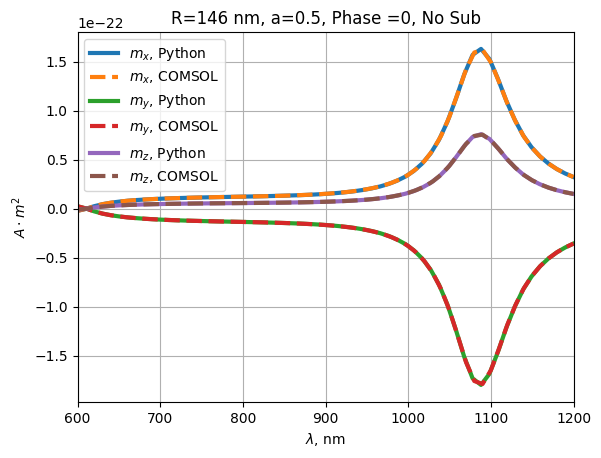

In [24]:
plt.plot(wls, M[:,0], label='$m_x$, Python', lw=3)
plt.plot(M_c[:,0], M_c[:,1], label='$m_x$, COMSOL', linestyle='--', lw=3)

plt.plot(wls, M[:,1], label='$m_y$, Python', lw=3)
plt.plot(M_c[:,0], M_c[:,2], label='$m_y$, COMSOL', lw=3, linestyle='--')

plt.plot(wls, M[:,2], label='$m_z$, Python', lw=3)
plt.plot(M_c[:,0], M_c[:,3], label='$m_z$, COMSOL', lw=3, linestyle='--')

plt.grid()
plt.xlim(wls[0], wls[-1])
plt.legend()
plt.title('R=146 nm, a=0.5, Phase =0, No Sub')
plt.xlabel('$\lambda$, nm')
plt.ylabel('$A \cdot m^2$')
plt.show()

In [27]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import force

eps_Si = frenel.get_interpolate('Si')


STOP = 45
R = 146
dist = 110
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5

wls = np.linspace(600, 1200, 60)

F = np.empty(shape=(len(wls), 3))

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], 1, point, R, eps_Si, angle, 1, phase, a, STOP)
    F[i,:] = f

100%|██████████| 60/60 [00:01<00:00, 41.41it/s]


In [28]:
F_c = np.loadtxt('comsol//F free space 146.txt', skiprows=8, delimiter=',')

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\1401681256.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


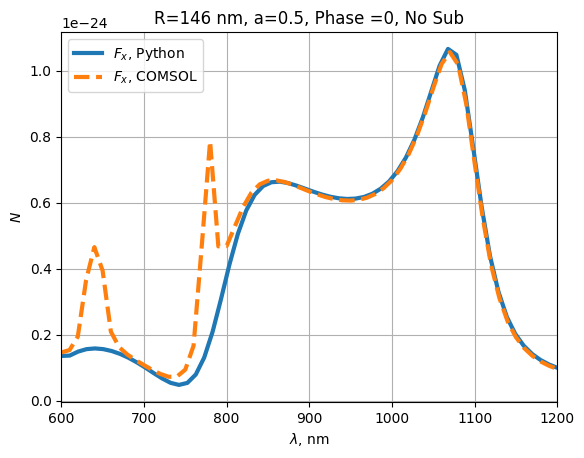

In [30]:
plt.plot(wls, F[:,0], label='$F_x$, Python', lw=3)
plt.plot(F_c[:,0], F_c[:,1], label='$F_x$, COMSOL', linestyle='--', lw=3)

plt.grid()
plt.xlim(wls[0], wls[-1])
plt.legend()
plt.title('R=146 nm, a=0.5, Phase =0, No Sub')
plt.xlabel('$\lambda$, nm')
plt.ylabel('$N$')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\3931262167.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


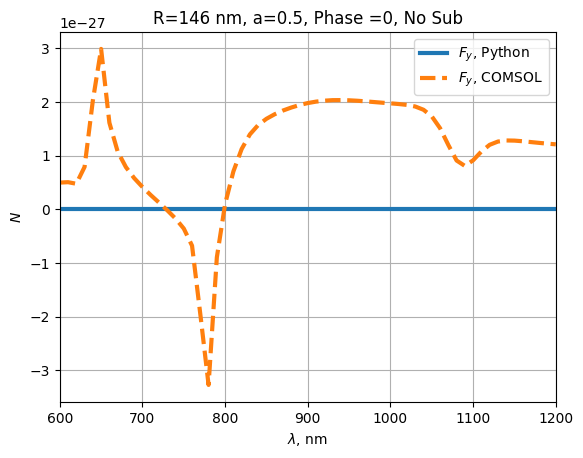

In [31]:
plt.plot(wls, F[:,1], label='$F_y$, Python', lw=3)
plt.plot(F_c[:,0], F_c[:,2], label='$F_y$, COMSOL', lw=3, linestyle='--')

plt.grid()
plt.xlim(wls[0], wls[-1])
plt.legend()
plt.title('R=146 nm, a=0.5, Phase =0, No Sub')
plt.xlabel('$\lambda$, nm')
plt.ylabel('$N$')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_15088\4102254796.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')


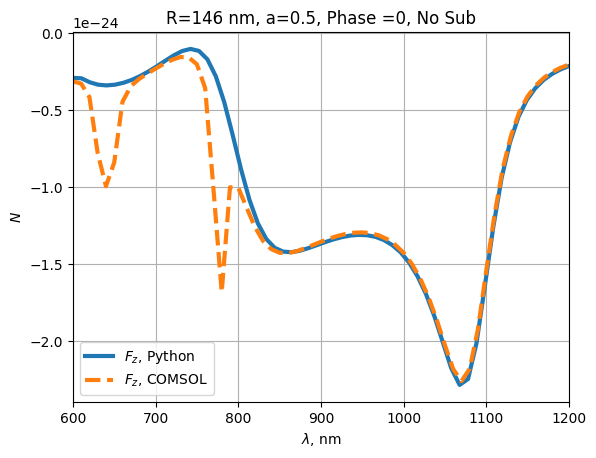

In [32]:
plt.plot(wls, F[:,2], label='$F_z$, Python', lw=3)
plt.plot(F_c[:,0], F_c[:,3], label='$F_z$, COMSOL', lw=3, linestyle='--')

plt.grid()
plt.xlim(wls[0], wls[-1])
plt.legend()
plt.title('R=146 nm, a=0.5, Phase =0, No Sub')
plt.xlabel('$\lambda$, nm')
plt.ylabel('$N$')
plt.show()

Как видим, расхождение силы связано с появлением квадрупоей, а в дипольном приближении все сходится.

## Зависимость силы и дипольных моментов от радиуса частицы

In [2]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import force

eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

STOP = 45
#R = 146
dist = 20
# point = [0,0,dist+R]
angle = 25*np.pi/180
phase = -np.pi/2
a = 0.5
wl=800

R = np.linspace(60, 170, 60)

F = np.empty(shape=(len(R), 3))

for i in tqdm(range(len(R))):
    point = [0, 0, dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle, 1, phase, a, STOP)
    F[i,:] = f

  0%|          | 0/60 [00:00<?, ?it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
 38%|███▊      | 23/60 [00:21<00:35,  1.05it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:57<00:00,  1.05it/s]


In [3]:
F_c = np.loadtxt('comsol/force_3d_sub_circ.txt', skiprows=8, delimiter=',')

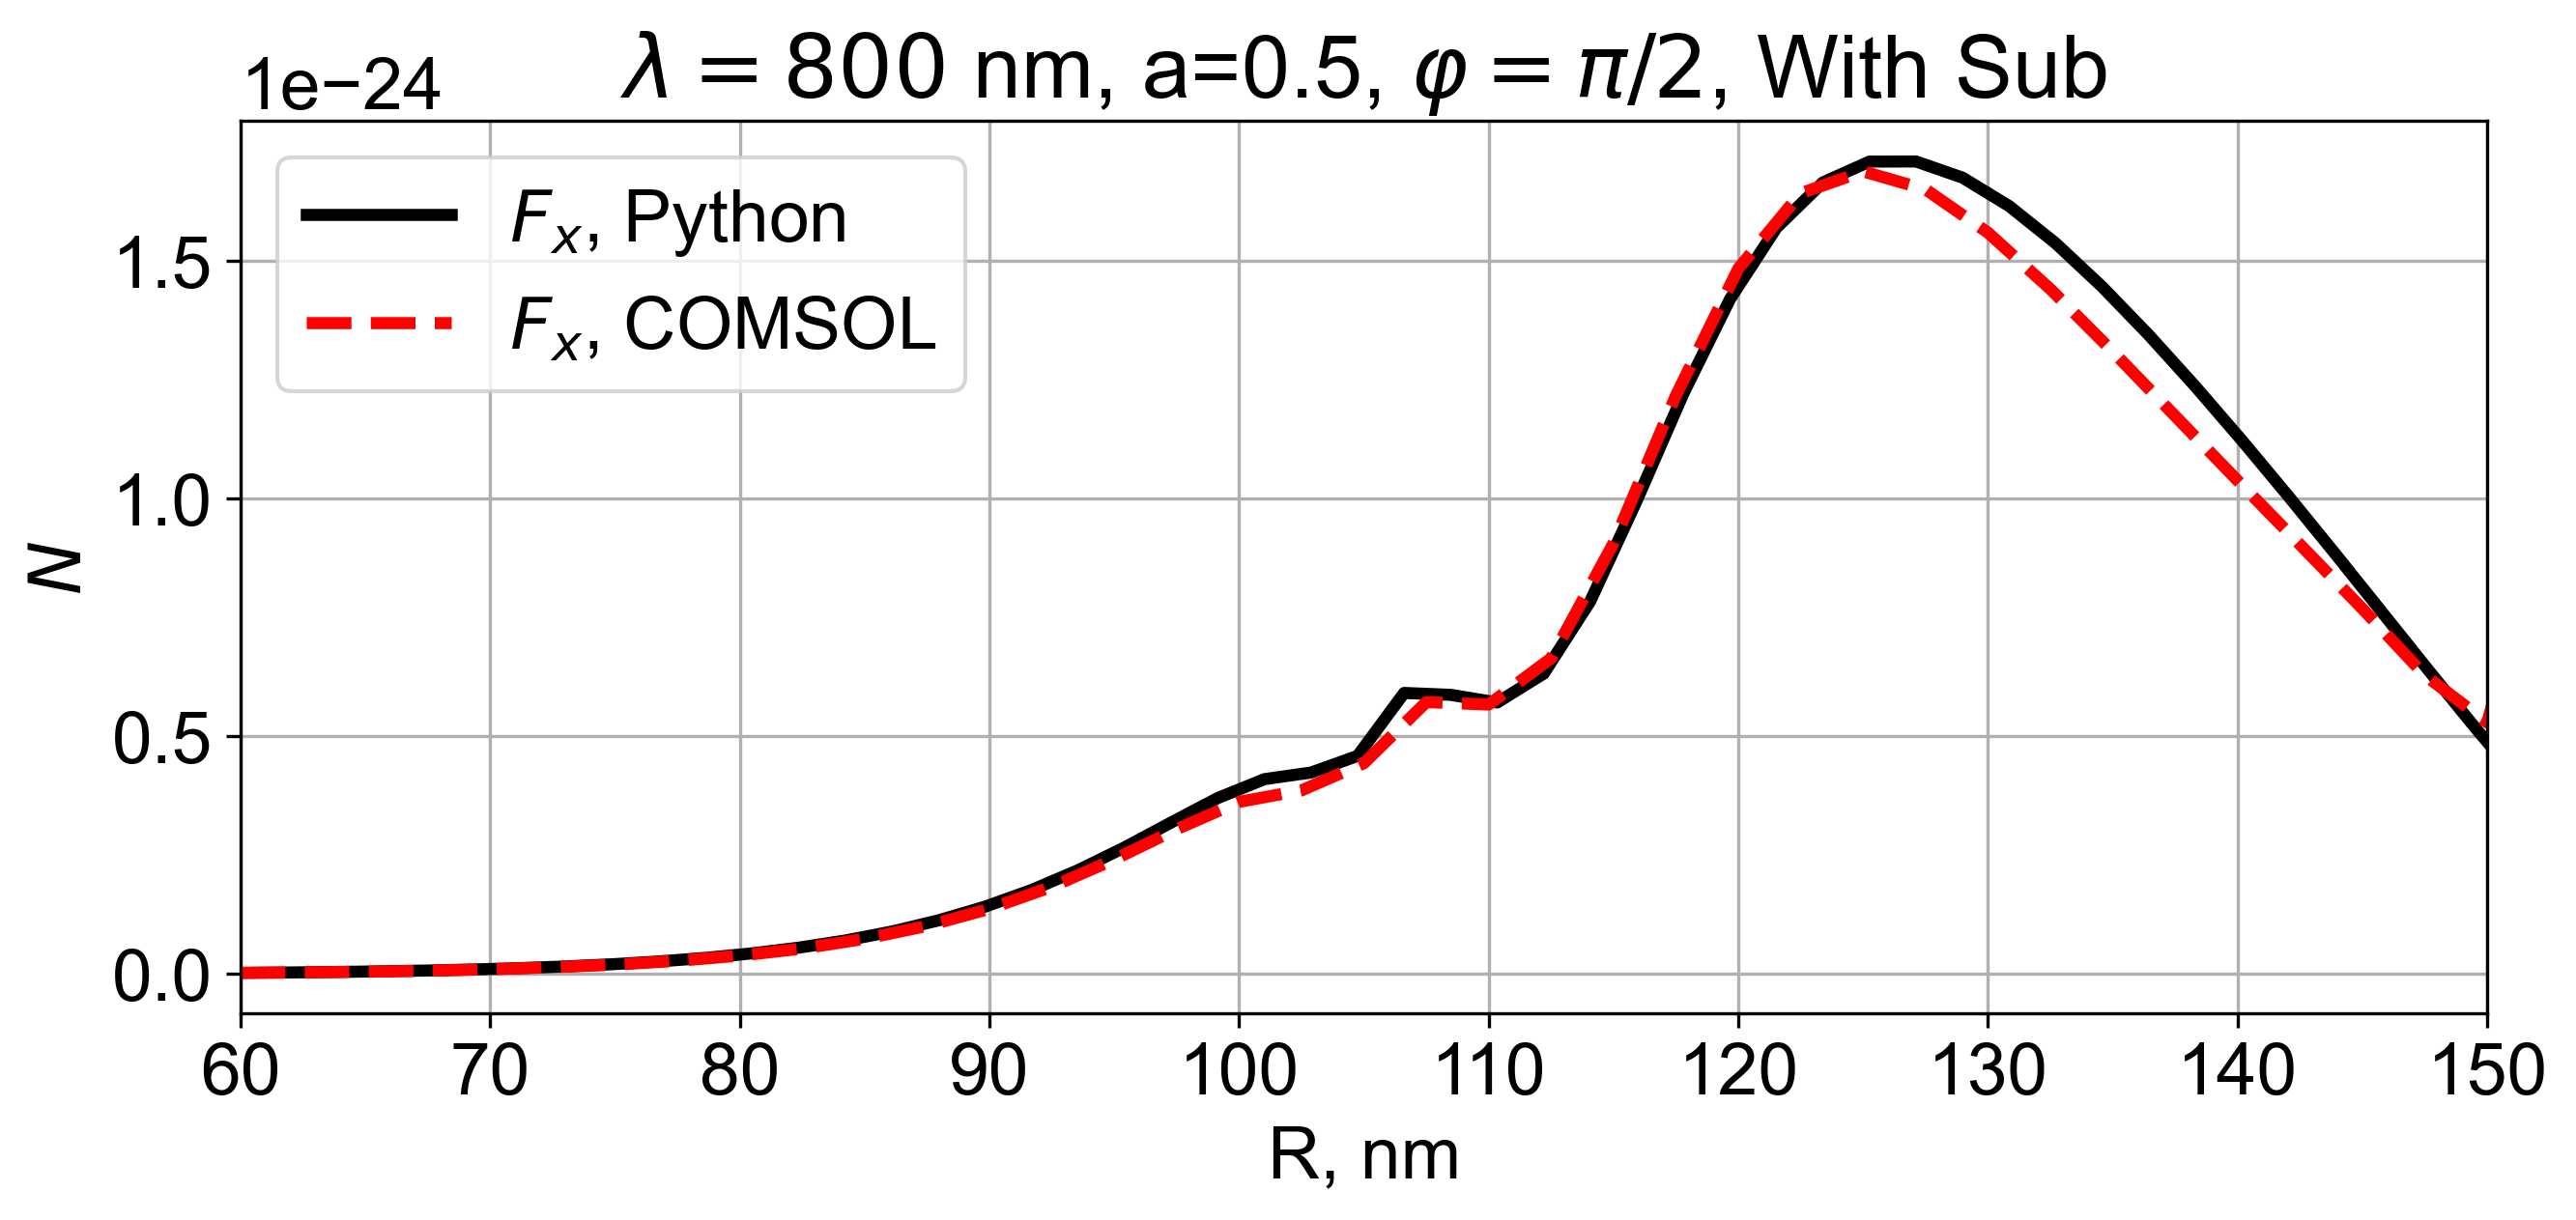

In [36]:
plt.figure(figsize=(10,4))
plt.plot(R, F[:,0], label='$F_x$, Python', lw=3, c='black')
plt.plot(F_c[:,0], F_c[:,1], label='$F_x$, COMSOL', linestyle='--', lw=3, c='red')

plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(r'$\lambda=800$ nm, a=0.5, $\varphi=\pi/2$, With Sub')
plt.xlabel('R, nm')
plt.ylabel('$N$')
plt.xlim(60, 150)
plt.show()

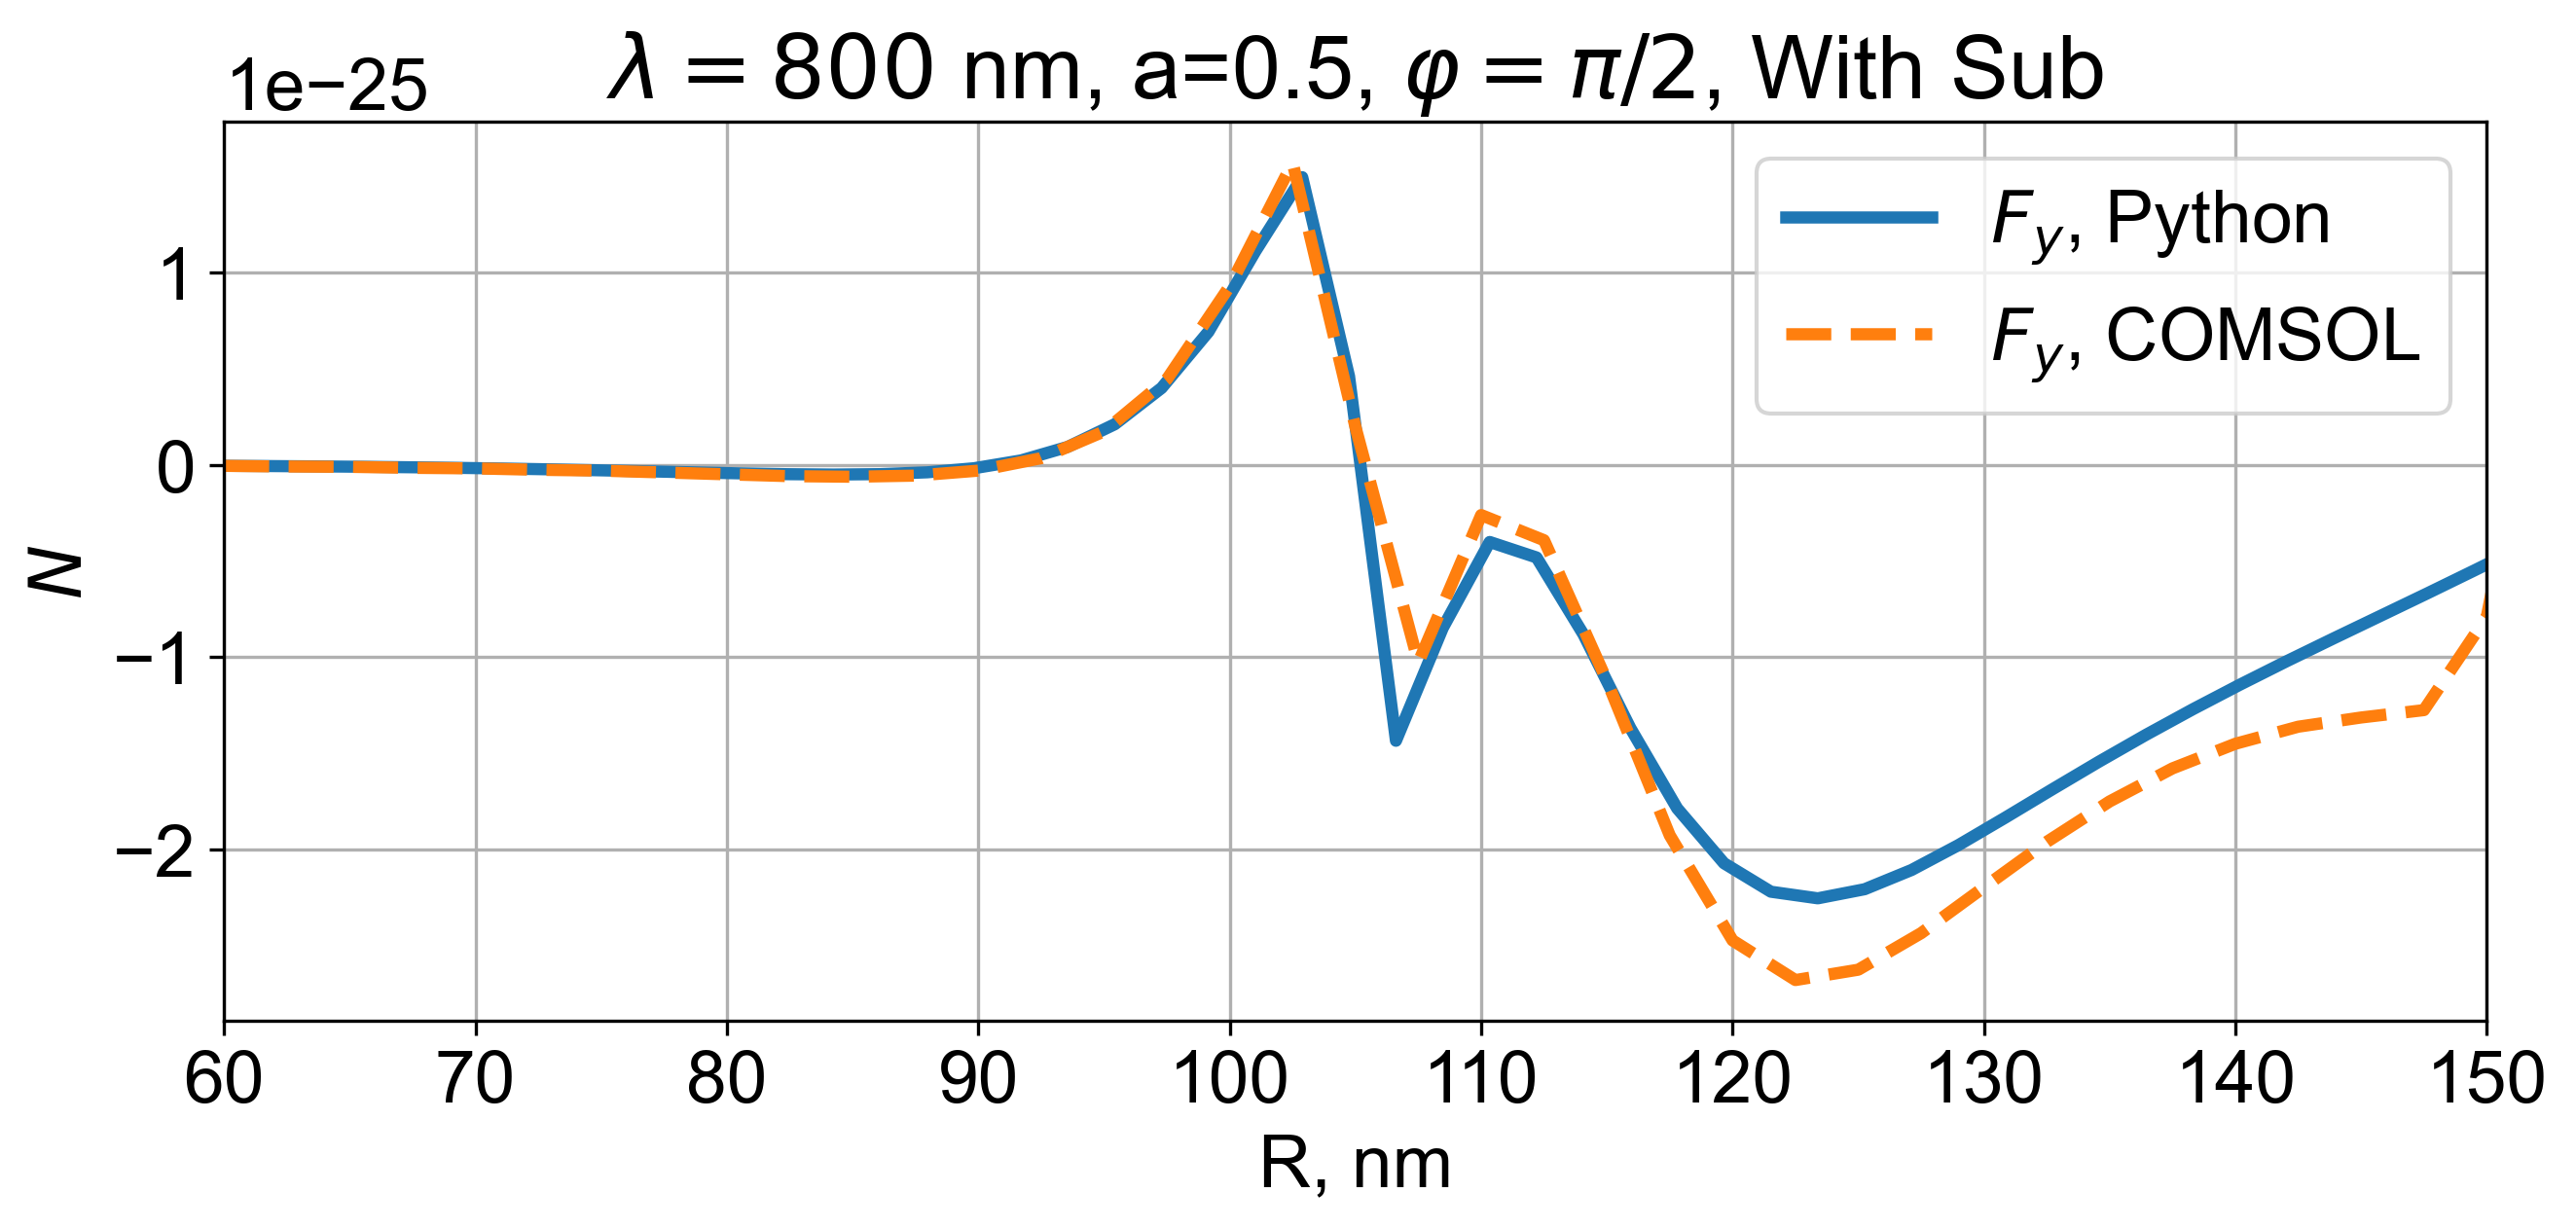

In [39]:
plt.figure(figsize=(10,4))
plt.plot(R, F[:,1], label='$F_y$, Python', lw=3)
plt.plot(F_c[:,0], F_c[:,2], label='$F_y$, COMSOL', linestyle='--', lw=3)


plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(r'$\lambda=800$ nm, a=0.5, $\varphi=\pi/2$, With Sub')
plt.xlabel('R, nm')
plt.ylabel('$N$')
plt.xlim(60, 150)
plt.show()

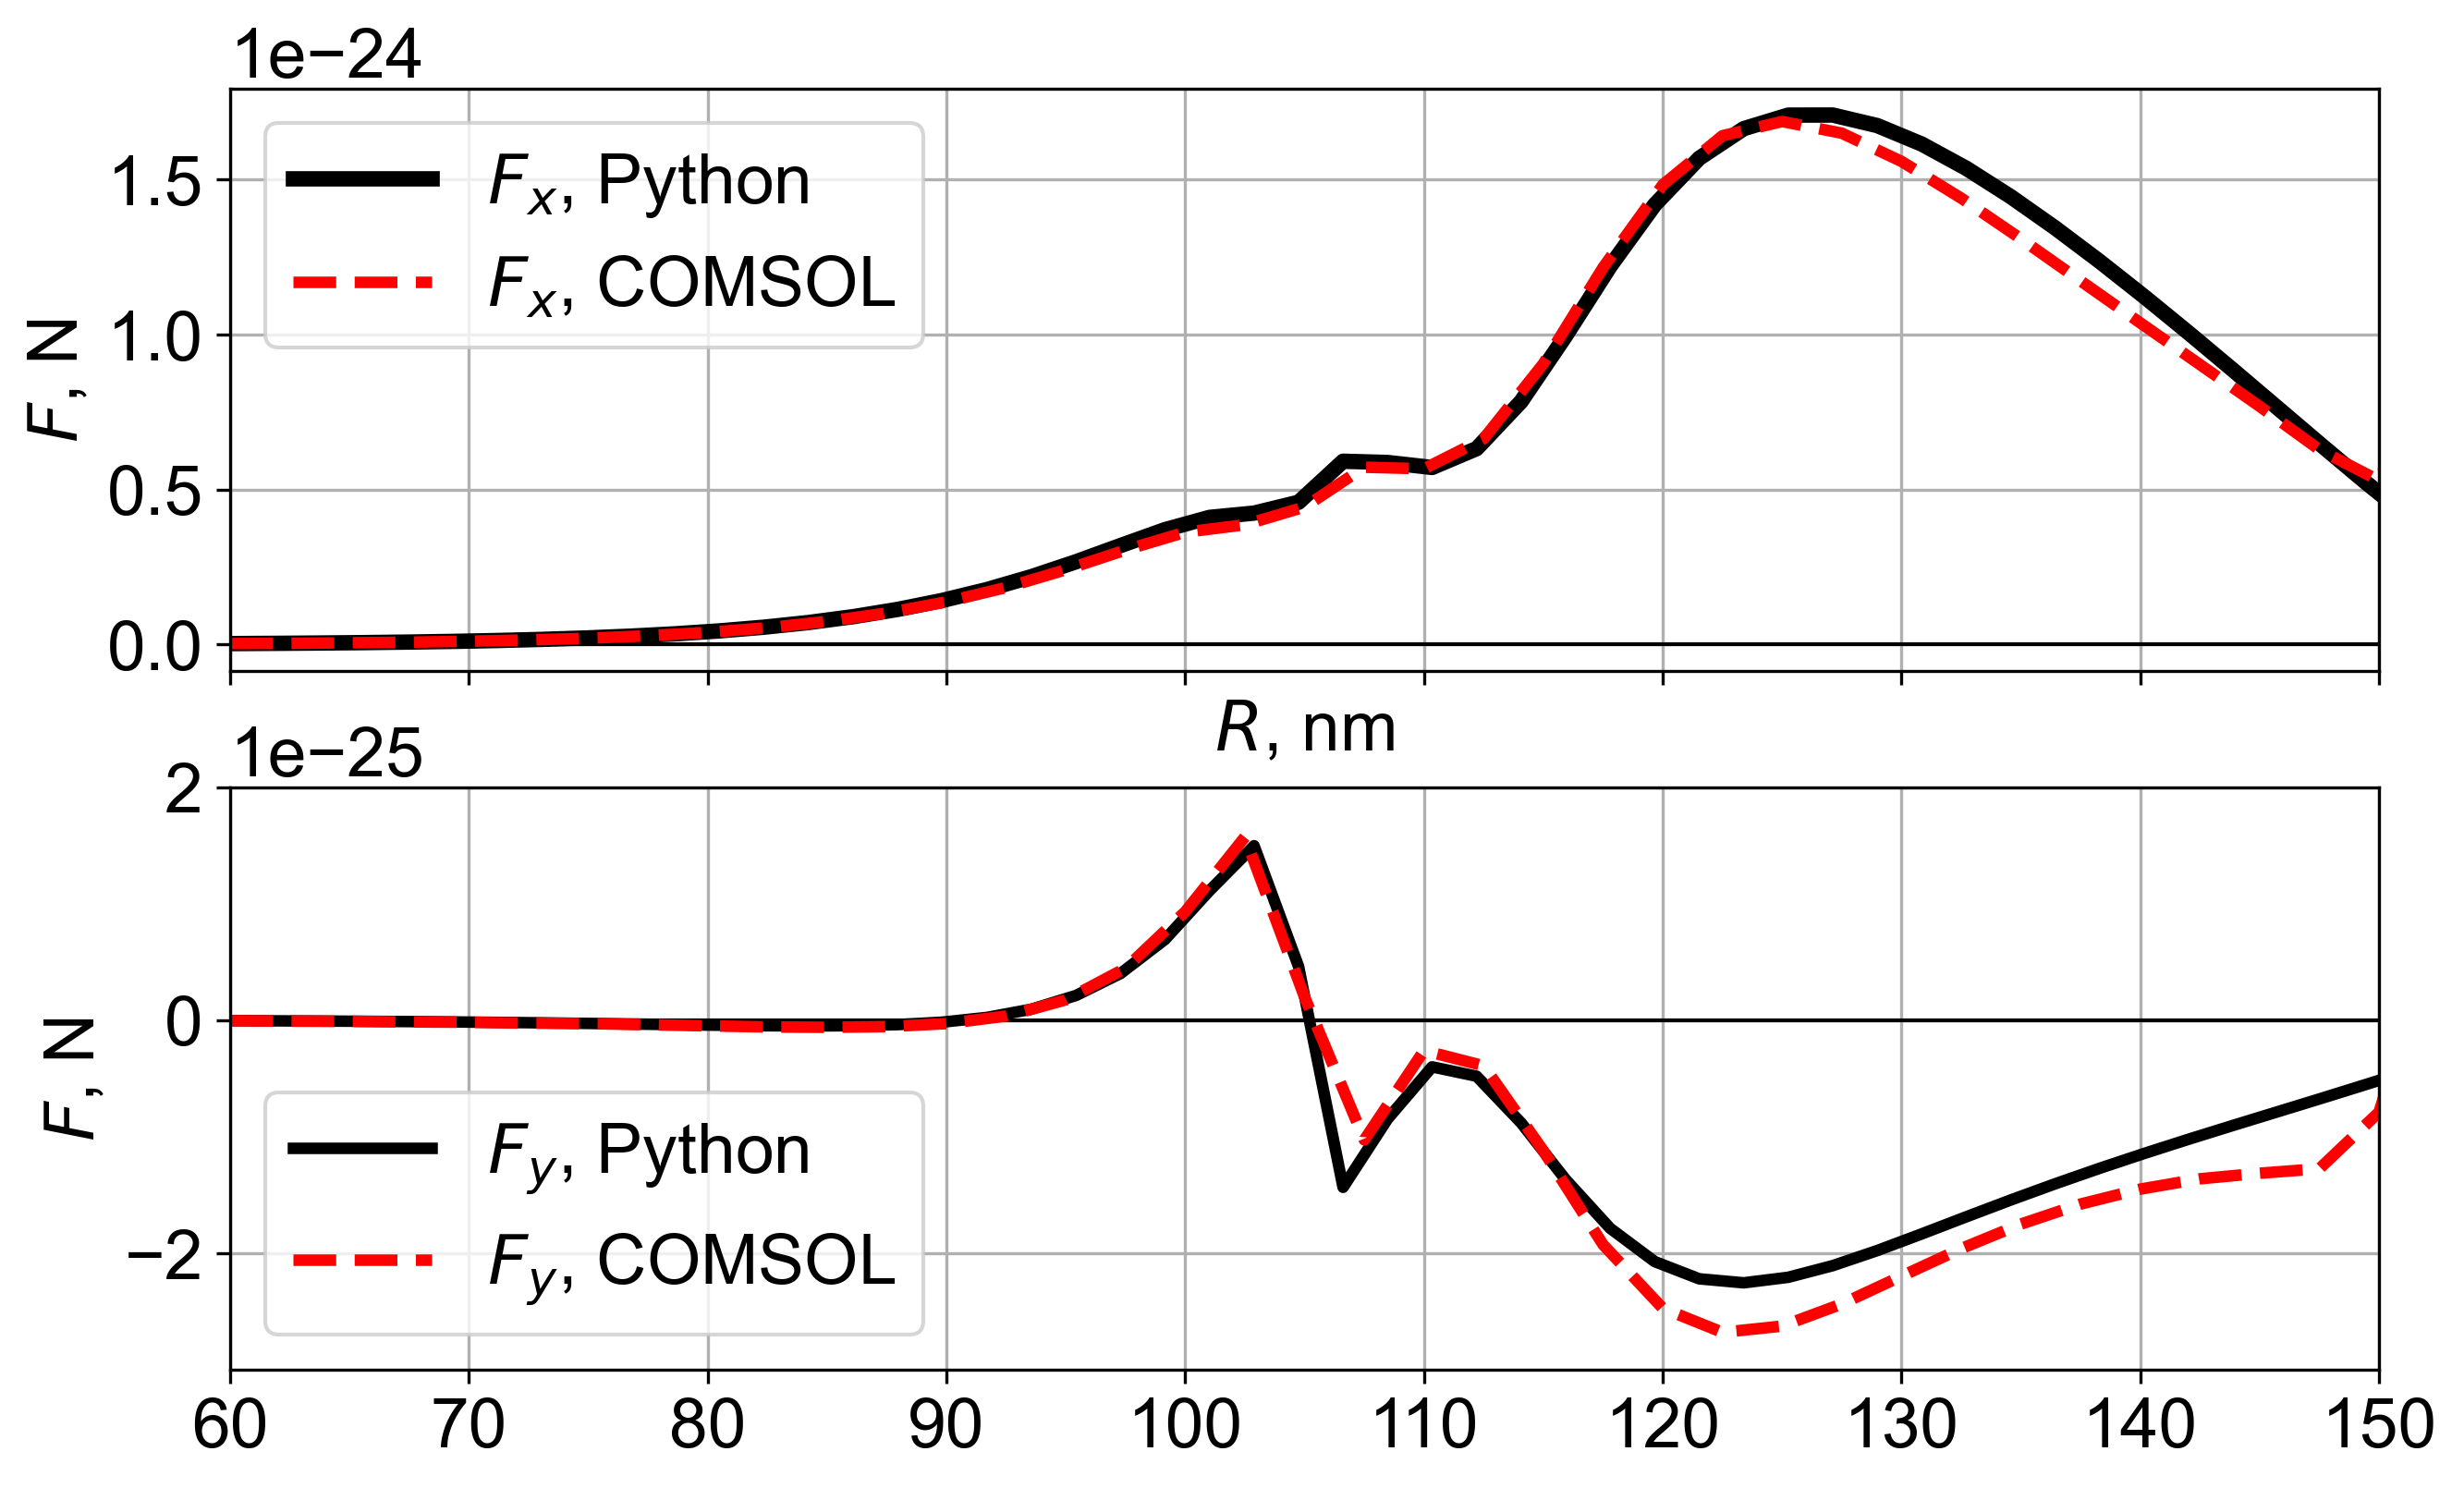

In [34]:
plt.rcParams.update({'font.family':'Arial', 'font.size': 18, 'figure.dpi':300})
plt.rcParams['text.usetex'] = False

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6), sharex=True)

ax1.plot([60, 150], [0,0], lw=1, c='black', linestyle='-')

ax1.plot(R, F[:,0], label=r'$F_x$, Python', lw=4, c='black')
ax1.plot(F_c[:,0], F_c[:,1], label='$F_x$, COMSOL', linestyle='--', lw=3, c='red')
ax1.grid()
ax1.set_xlim(60,150)
ax1.legend(loc = 'upper left')
ax1.set_xlabel('$R$, nm')
ax1.set_ylabel('$F$, N')


ax2.plot([60, 150], [0,0], lw=1, c='black', linestyle='-')


ax2.plot(R, F[:,1], label='$F_y$, Python', lw=3, c='black')
ax2.plot(F_c[:,0], F_c[:,2], label='$F_y$, COMSOL', linestyle='--', lw=3, c='red')
ax2.grid()
ax2.set_ylim(-3e-25,2e-25)
ax2.set_xlim(60,150)
ax2.set_ylabel('$F$, N')
ax2.legend(loc = 'lower left')

#plt.savefig('fxy_from_R_only_tensor.png', format='png', transparent=True, bbox_inches="tight")
plt.show()

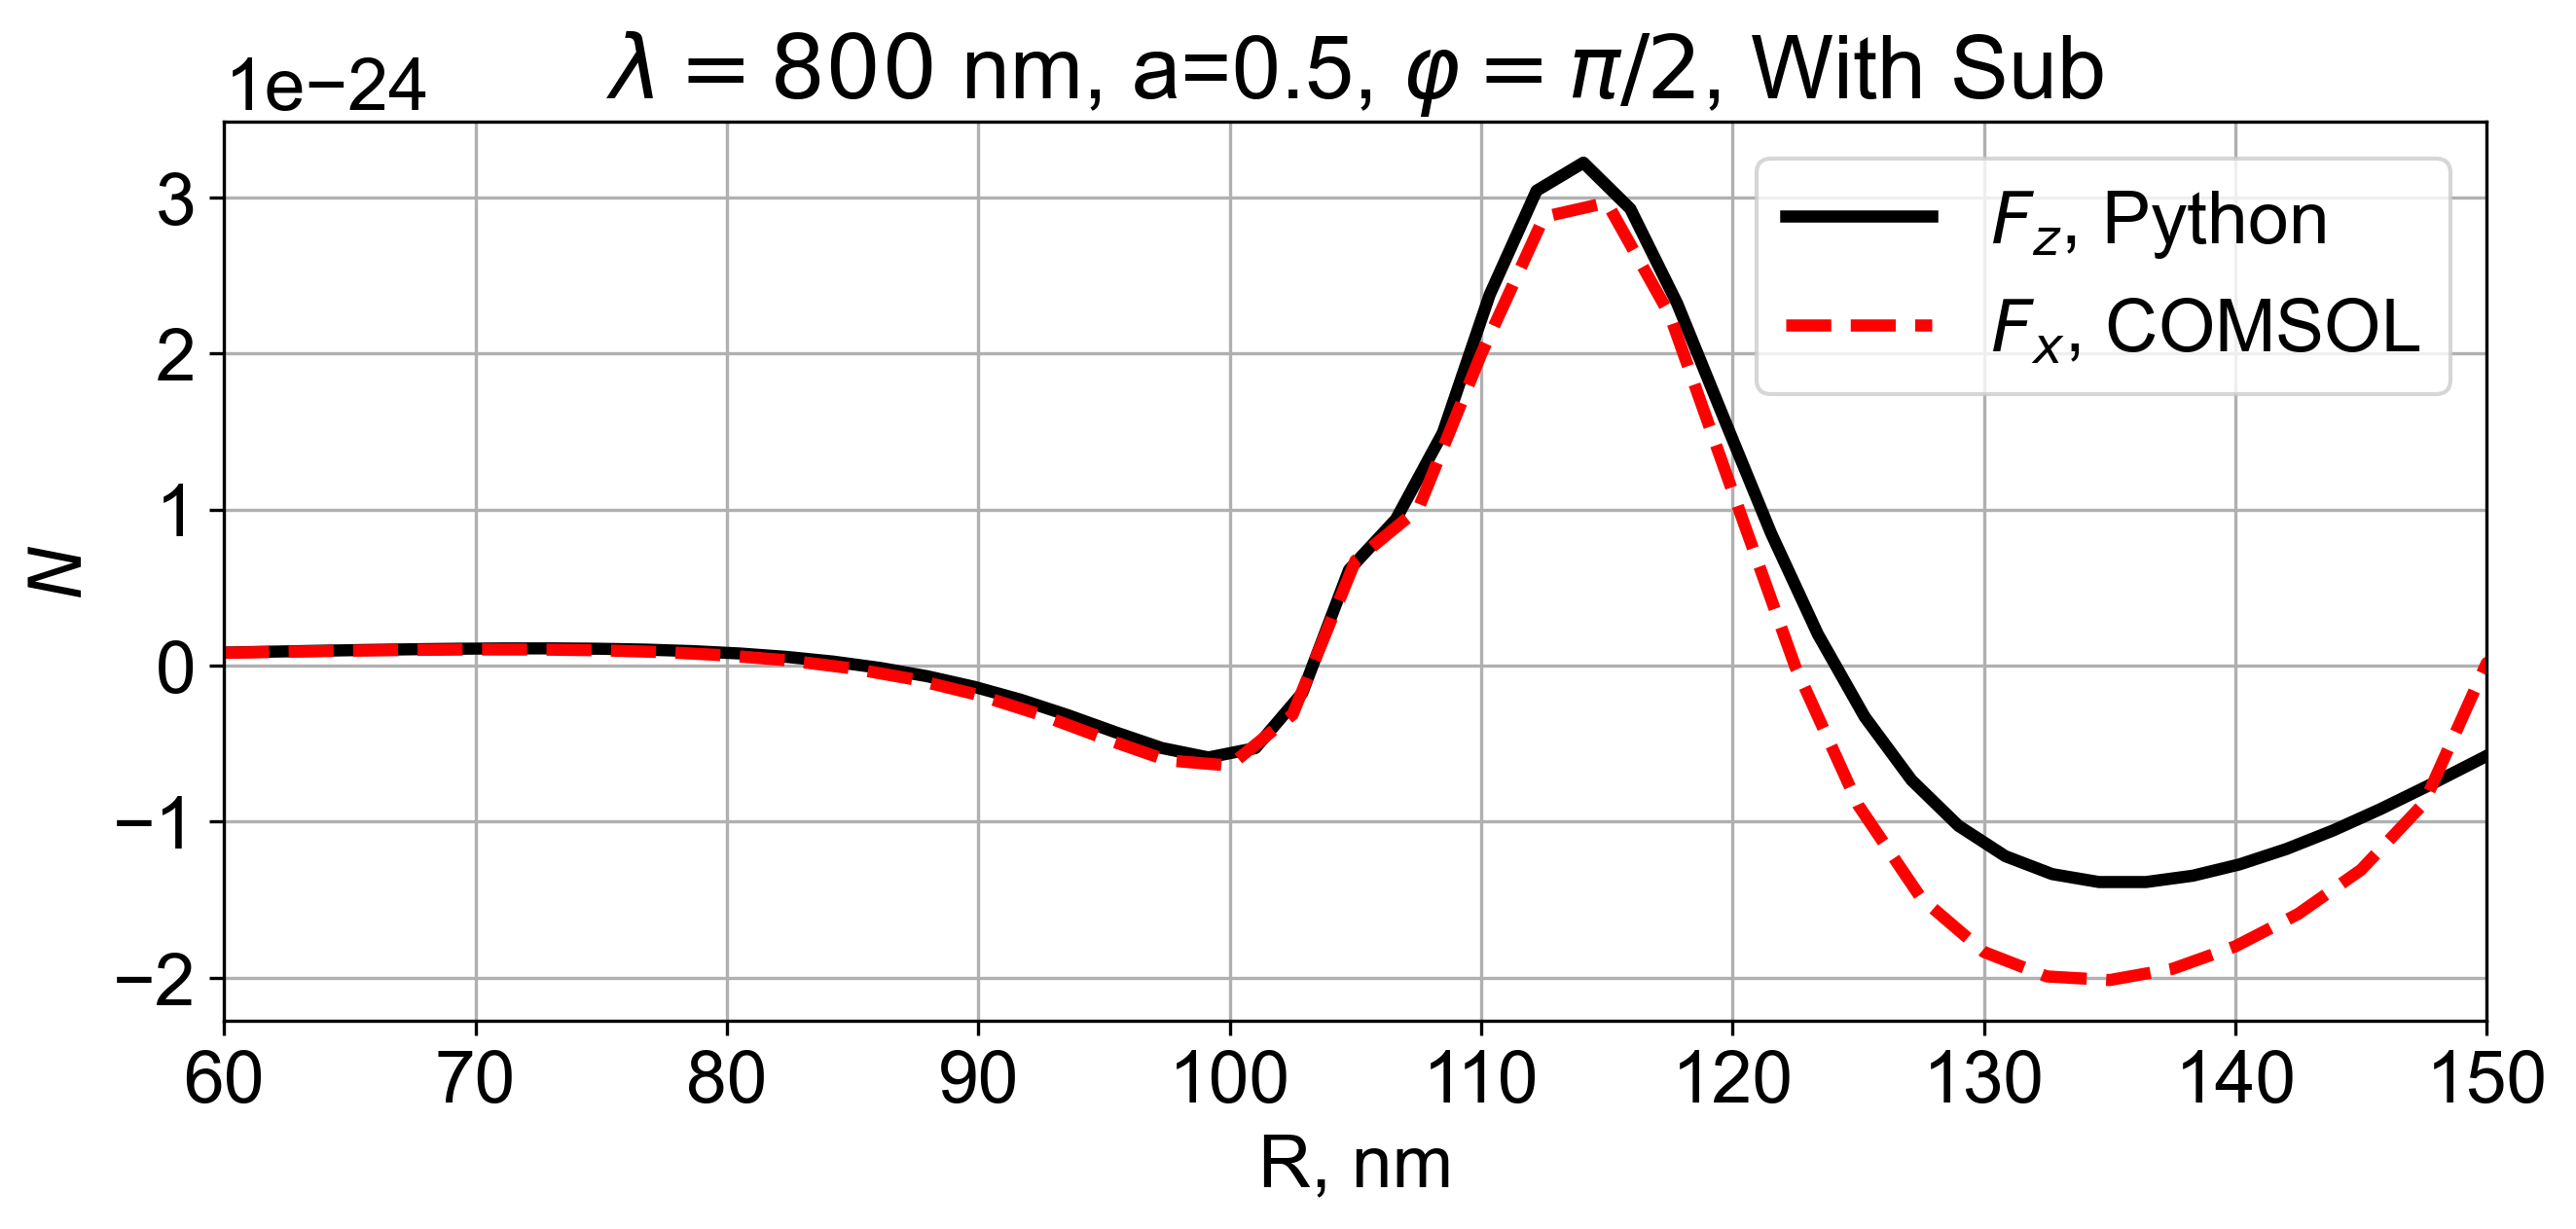

In [41]:
plt.figure(figsize=(10,4))
plt.plot(R, F[:,2], label='$F_z$, Python', lw=3, c='black')
plt.plot(F_c[:,0], F_c[:,3], label='$F_x$, COMSOL', linestyle='--', lw=3, c='red')


plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(r'$\lambda=800$ nm, a=0.5, $\varphi=\pi/2$, With Sub')
plt.xlabel('R, nm')
plt.ylabel('$N$')
plt.xlim(60, 150)
plt.show()

In [61]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import force

eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

STOP = 45
#R = 146
dist = 20
# point = [0,0,dist+R]
angle = 25*np.pi/180
phase = -np.pi/2
a = 0.5
wl=800
R = np.linspace(60, 170, 60)


P, M = np.empty(shape=(len(R), 3)), np.empty(shape=(len(R), 3))

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m =  dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    P[i,:] = p[:,0]
    M[i,:] = m[:,0]


  

  0%|          | 0/60 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\2837447306.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  P[i,:] = p[:,0]
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\2837447306.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i,:] = m[:,0]
 38%|███▊      | 23/60 [00:26<00:42,  1.14s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:444: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [01:07<00:00,  1.13s/it]


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\652014116.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda$={wl} nm, a={round(a,2)}, Phase={round(phase,2)}, With sub')
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\652014116.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$C \cdot m$')


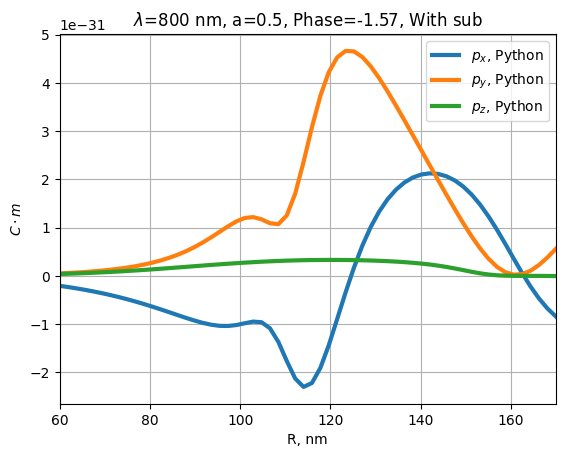

In [62]:
plt.plot(R, P[:,0], label='$p_x$, Python', lw=3)
#plt.plot(P_c[:,0], P_c[:,1], label='$p_x$, COMSOL', linestyle='--', lw=3)

plt.plot(R, P[:,1], label='$p_y$, Python', lw=3)
#plt.plot(P_c[:,0], P_c[:,2], label='$p_y$, COMSOL', lw=3, linestyle='--')

plt.plot(R, P[:,2], label='$p_z$, Python', lw=3)
#plt.plot(P_c[:,0], P_c[:,3], label='$p_z$, COMSOL', lw=3, linestyle='--')

plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(f'$\lambda$={wl} nm, a={round(a,2)}, Phase={round(phase,2)}, With sub')
plt.xlabel('R, nm')
plt.ylabel('$C \cdot m$')
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\1598489918.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$\lambda$={wl} nm, a={a}, Phase={round(phase,2)}, With sub')
C:\Users\borod\AppData\Local\Temp\ipykernel_4328\1598489918.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$A \cdot m^2$')


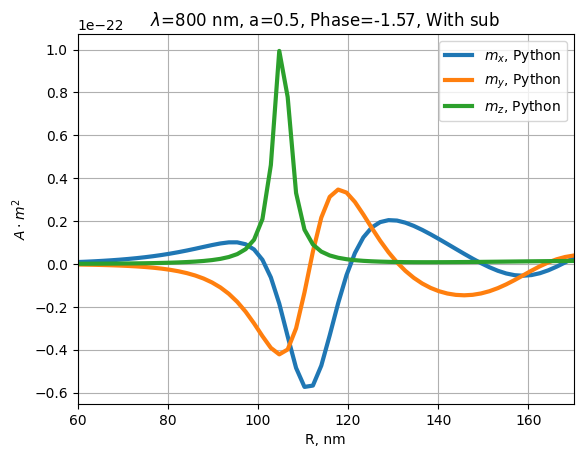

In [63]:
plt.plot(R, M[:,0], label='$m_x$, Python', lw=3)
#plt.plot(M_c[:,0], M_c[:,1], label='$m_x$, COMSOL', linestyle='--', lw=3)

plt.plot(R, M[:,1], label='$m_y$, Python', lw=3)
#plt.plot(M_c[:,0], M_c[:,2], label='$m_y$, COMSOL', lw=3, linestyle='--')

plt.plot(R, M[:,2], label='$m_z$, Python', lw=3)
#plt.plot(M_c[:,0], M_c[:,3], label='$m_z$, COMSOL', lw=3, linestyle='--')

plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(f'$\lambda$={wl} nm, a={a}, Phase={round(phase,2)}, With sub')
plt.xlabel('R, nm')
plt.ylabel('$A \cdot m^2$')
plt.show()

# Тут меняю поляризацию по разному

In [25]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import force

eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

STOP = 45
#R = 146
dist = 20
# point = [0,0,dist+R]
angle = 25*np.pi/180
phase = -np.pi/2
a = 0.5
wl=800

R = np.linspace(5, 180, 60)

F_y = np.empty(shape=(len(R), 8))
F_x = np.empty(shape=(len(R), 8))
F_z = np.empty(shape=(len(R), 8))

for i in tqdm(range(len(R))):
    point = [0, 0, dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle, 1, phase, a, STOP, full_output=True)
    F_x[i,:] = f[0]
    F_z[i,:] = f[2]
    F_y[i,:] = f[1]

  2%|▏         | 1/60 [00:02<02:20,  2.38s/it]


KeyboardInterrupt: 

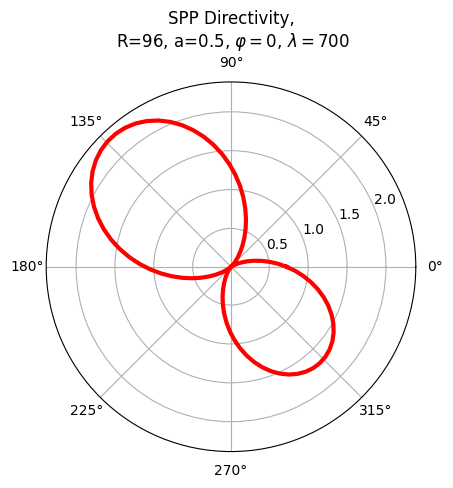

In [35]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
from scipy.integrate import quad
c_const = 299792458

def get_intencity(wl, P,M, eps_Au):
    px,py,pz = P
    mx, my,mz = M
    ka = -1j*np.sqrt(1/(eps_Au(wl)+1))
    kspp = np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))
    return lambda phi:  np.abs((mx/c_const+1j*ka*py)*np.sin(phi) + (my/c_const - 1j*ka*px)*np.cos(phi) - kspp*pz)**2
    
    
    
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

STOP = 50
R = 96
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5
wl = 700


p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
p,m = p[:,0],m[:,0]
intenc = get_intencity(wl, p,m,eps_Au)

phi = np.linspace(0,2*np.pi,100)
I = intenc(phi)
Imax = quad(intenc, 0, 2*np.pi)[0]
D = 2*np.pi*I/Imax

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi, D, lw=3, c='red')
ax.grid(True)
ax.set_ylim(min(D))
plt.title(f'SPP Directivity,\n R={R}, a={a}, $\\varphi=${phase}, $\\lambda=${wl}')
plt.show()


100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


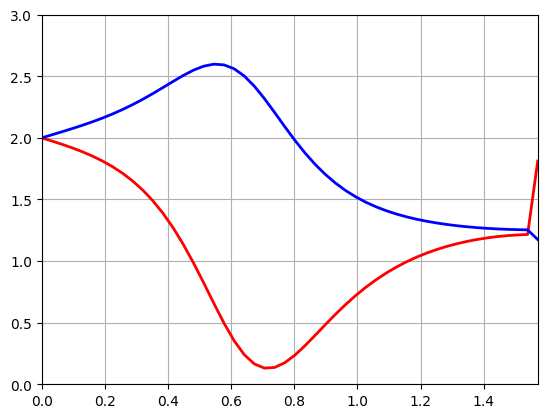

In [66]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
from scipy.integrate import quad
c_const = 299792458

def get_intencity(wl, P,M, eps_Au):
    px,py,pz = P
    mx, my,mz = M
    ka = -1j*np.sqrt(1/(eps_Au(wl)+1))
    kspp = np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))
    return lambda phi:  np.abs((mx/c_const+1j*ka*py)*np.sin(phi) + (my/c_const - 1j*ka*px)*np.cos(phi) - kspp*pz)**2
    
    
    
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

STOP = 50
R = 295/2
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0
wl = 892

angles = np.linspace(0, np.pi/2, 50)

P, M = np.empty(shape=(len(angles), 3), dtype=complex), np.empty(shape=(len(angles), 3), dtype=complex)

fwd,bwd = np.empty(shape=(len(angles), 1)), np.empty(shape=(len(angles), 1))

for i in tqdm(range(len(angles))):
    p,m =  dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angles[i], amplitude=1, phase=phase, a=a, stop=STOP )
    P[i,:] = p[:,0]
    M[i,:] = m[:,0]
    intenc = get_intencity(wl, P[i,:],M[i,:],eps_Au)
    Imax =quad(intenc, 0, 2*np.pi)[0]
    fwd[i] = 2*np.pi*intenc(0)/Imax
    bwd[i] = 2*np.pi*intenc(np.pi)/Imax
    
    

# p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
# p,m = p[:,0],m[:,0]
# intenc = get_intencity(wl, p,m,eps_Au)

# phi = np.linspace(0,2*np.pi,100)
# I = intenc(phi)
# Imax = quad(intenc, 0, 2*np.pi)[0]
# D = 2*np.pi*I/Imax

# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(phi, D, lw=3, c='red')
# ax.grid(True)
# ax.set_ylim(min(D))
# plt.show()

plt.plot(angles, fwd, c='red', lw=2)
plt.plot(angles, bwd, c='blue', lw=2)
plt.grid()
plt.xlim(0,np.pi/2)
plt.ylim(0,3)
plt.show()

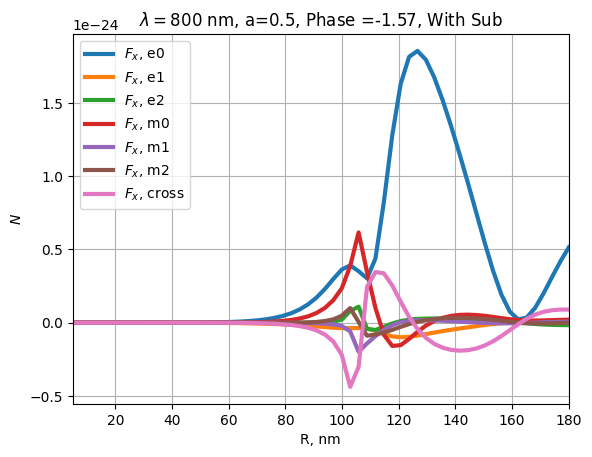

In [4]:
Fx = F_x[:,0]
Fx_e0 = F_x[:,1]
Fx_e1 = F_x[:,2]
Fx_e2 = F_x[:,3]
Fx_m0 = F_x[:,4]
Fx_m1 = F_x[:,5]
Fx_m2 = F_x[:,6]
Fx_cross = F_x[:,7]



# plt.plot(R, Fy, label='$F_y$, tot', lw=3)
plt.plot(R, Fx_e0, label='$F_x$, e0', lw=3)
plt.plot(R, Fx_e1, label='$F_x$, e1', lw=3)
plt.plot(R, Fx_e2, label='$F_x$, e2', lw=3)
plt.plot(R, Fx_m0, label='$F_x$, m0', lw=3)
plt.plot(R, Fx_m1, label='$F_x$, m1', lw=3)
plt.plot(R, Fx_m2, label='$F_x$, m2', lw=3)
plt.plot(R, Fx_cross, label='$F_x$, cross', lw=3)


plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(f'$\lambda={wl}$ nm, a={a}, Phase ={round(phase,2)}, With Sub')
plt.xlabel('R, nm')
plt.ylabel('$N$')
plt.show()

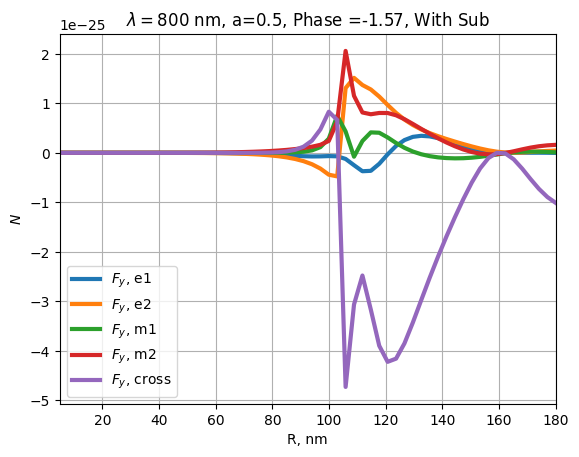

In [5]:
Fy = F_y[:,0]
Fy_e1 = F_y[:,2]
Fy_e2 = F_y[:,3]
Fy_m1 = F_y[:,5]
Fy_m2 = F_y[:,6]
Fy_cross = F_y[:,7]



# plt.plot(R, Fy, label='$F_y$, tot', lw=3)
plt.plot(R, Fy_e1, label='$F_y$, e1', lw=3)
plt.plot(R, Fy_e2, label='$F_y$, e2', lw=3)
plt.plot(R, Fy_m1, label='$F_y$, m1', lw=3)
plt.plot(R, Fy_m2, label='$F_y$, m2', lw=3)
plt.plot(R, Fy_cross, label='$F_y$, cross', lw=3)


plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(f'$\lambda={wl}$ nm, a={a}, Phase ={round(phase,2)}, With Sub')
plt.xlabel('R, nm')
plt.ylabel('$N$')
plt.show()

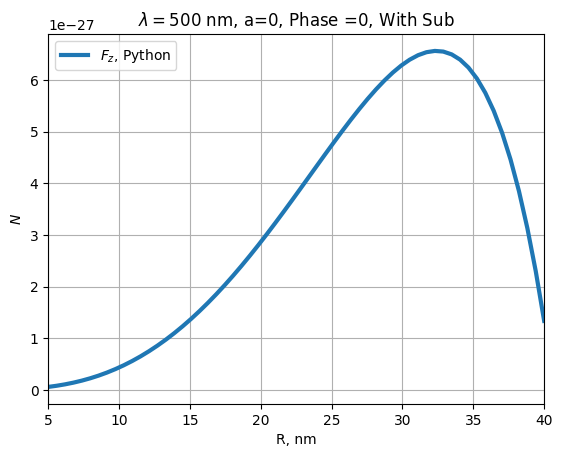

In [16]:
plt.plot(R, F[:,2], label='$F_z$, Python', lw=3)


plt.grid()
plt.xlim(R[0], R[-1])
plt.legend()
plt.title(f'$\lambda={wl}$ nm, a={a}, Phase ={phase}, With Sub')
plt.xlabel('R, nm')
plt.ylabel('$N$')
plt.show()